In [ ]:
import pandas as pd
import re

# Read the Excel file into a DataFrame using 'latin1' encoding
df = pd.read_excel('laptop_price.xlsx',header=0,index_col=0)

# Assuming 'index_position' is the position of the column you want to delete
columns_to_delete = ["laptop_ID", "Product", "TypeName","OpSys","Gpu"]
for column in columns_to_delete:
    if column in df.columns:
        del df[column]

AF=df
# Display the first 10 rows

print(df)
df = df[df['Cpu'].str.contains(r'Intel Core i', regex=True)]
df = df[df['Memory'].apply(lambda x: len(x.split()) <= 2)]





pattern = r'(\d+)x(\d+)'
df['Height'] = df['ScreenResolution'].str.extract(pattern)[0].astype(int)
df['Length'] = df['ScreenResolution'].str.extract(pattern)[1].astype(int)
df['ScreenResolution_Product'] = df['Height'] * df['Length']
del df["Length"]
del df["Height"]
# Dropping the original ScreenResolution column
df.drop(columns=['ScreenResolution'], inplace=True)
df['powerCpu'] = df['Cpu'].str.split(' ').str[-1].str.replace('GHz', '')
df['powerCpu'] = df['powerCpu'].astype(float)
df['Model'] = df['Cpu'].str.split(' ').str[2].str.replace('i', '')
df['Model'] = df['Model'].astype(float)
df['powerCpu'] = df['powerCpu']*df['Model']
df['Cpu_Generation'] = df['Cpu'].str.extract(r'Intel Core i\d+ (\d+)', expand=False).fillna(4)
df['Cpu_Generation'] = df['Cpu_Generation'].astype(int)
df.loc[df['Cpu_Generation'] < 1000, 'Cpu_Generation'] = 7250
df['powerCpu'] = df['powerCpu']*df['Model']*df['Cpu_Generation']*(df['powerCpu']**0.5)
del df["Model"]
del df["Cpu"]
del df["Cpu_Generation"]


df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype(float)

df['Memory_size'] = df['Memory'].str.extract(r'(\d+)').astype(int)
df.loc[df['Memory'].str.contains('TB'), 'Memory_size'] *= 1024
df['Memory_Type'] = df['Memory'].str.split(' ').str[1]
df.loc[df['Memory_Type'] == 'HDD', 'Memory_size'] *= 1
df.loc[df['Memory_Type'] == 'SSD', 'Memory_size'] *= 1
del df["Memory"]


df.rename(columns={'ScreenResolution_Product': 'ScreenResolution'}, inplace=True)
# Extracting only numbers from Weight column
df =df.head(500)
print(df)


          Company  Inches                            ScreenResolution  \
laptop_ID                                                               
1           Apple    13.3          IPS Panel Retina Display 2560x1600   
2           Apple    13.3                                    1440x900   
3              HP    15.6                           Full HD 1920x1080   
4           Apple    15.4          IPS Panel Retina Display 2880x1800   
5           Apple    13.3          IPS Panel Retina Display 2560x1600   
...           ...     ...                                         ...   
1316       Lenovo    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1317       Lenovo    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1318       Lenovo    14.0                                    1366x768   
1319           HP    15.6                                    1366x768   
1320         Asus    15.6                                    1366x768   

                                            Cpu   

<ipython-input-2-5b6b0c49fa30>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df, hist_kwds={'bins': 30}, ax=ax)


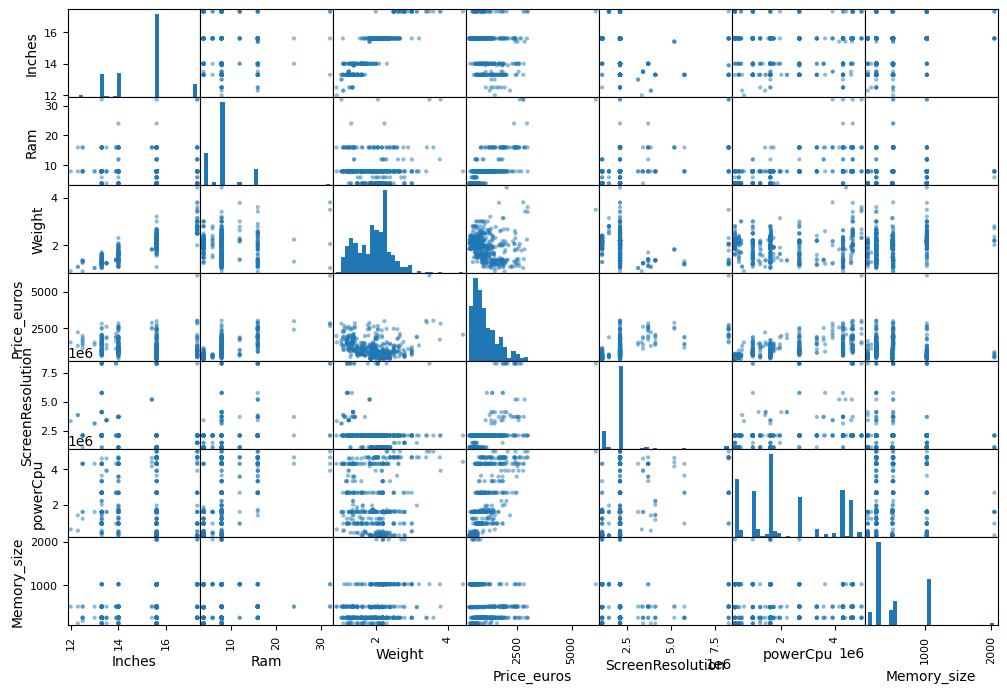

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame
# Set the desired figure size
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the values (width, height) as per your preference

# Plot the scatter matrix
pd.plotting.scatter_matrix(df, hist_kwds={'bins': 30}, ax=ax)

# Display the plot
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame

# Drop non-numeric columns
X = df.drop(['Company', 'Memory_Type'], axis=1)

# Instantiate StandardScaler
scaler = StandardScaler()

# Standardize the data
x_cr = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame

# Calculate the correlation matrix


X.corr()

,Inches,Ram,Weight,Price_euros,ScreenResolution,powerCpu,Memory_size
Inches,1.000000,-0.064698,0.867201,-0.208620,-0.221141,-0.009940,0.344026
Ram,-0.064698,1.000000,-0.017116,0.724171,0.411646,0.544703,0.023940
Weight,0.867201,-0.017116,1.000000,-0.163809,-0.230377,0.027301,0.330086
Price_euros,-0.208620,0.724171,-0.163809,1.000000,0.569342,0.619500,-0.159825
ScreenResolution,-0.221141,0.411646,-0.230377,0.569342,1.000000,0.284716,-0.064113
powerCpu,-0.009940,0.544703,0.027301,0.619500,0.284716,1.000000,-0.032813
Memory_size,0.344026,0.023940,0.330086,-0.159825,-0.064113,-0.032813,1.000000


In [ ]:
#k-means
from sklearn import cluster
import numpy as np

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(x_cr)

#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
Cldf=pd.DataFrame(X.index[idk],kmeans.labels_[idk])
print(Cldf)
#distances aux centres de classes des observations
A=kmeans.transform(x_cr)
print(A)
print(pd.DataFrame({'Classe':kmeans.labels_+1,'ID':X.index,'DistG1':A[:,0],'DistG2':A[:,1],'DistG3':A[:,2]}))
#print(pandas.DataFrame({'Classe':kmeans.labels_+1,'ID':X.index,'Fonction':Tab.Fonction}))

#print(Tab.Fonction[idk])
#ACP
from sklearn.decomposition import PCA
acp= PCA(n_components =2).fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    laptop_ID
0         366
0         422
0         419
0         417
0         415
..        ...
2         405
2         406
2         413
2         418
2         498

[500 rows x 1 columns]
[[3.6437936  1.52790216 3.43804143]
 [1.37673039 2.11006278 3.92121061]
 [4.77952871 4.29735331 1.28488281]
 ...
 [2.79781808 2.24058492 4.42550396]
 [1.56388717 3.31944001 5.32325131]
 [1.66421438 2.62175756 4.57589068]]
     Classe   ID    DistG1    DistG2    DistG3
0         2    1  3.643794  1.527902  3.438041
1         1    3  1.376730  2.110063  3.921211
2         3    4  4.779529  4.297353  1.284883
3         2    5  3.787887  1.705674  2.870503
4         2    9  3.527579  2.252474  2.358458
..      ...  ...       ...       ...       ...
495       1  743  2.193445  3.230674  4.171139
496       3  744  4.118448  4.342503  2.226043
497       2  745  2.797818  2.240585  4.425504
498       1  747  1.563887  3.319440  5.323251
499       1  749  1.664214  2.621758  4.575891

[500 rows x 5 columns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     Classe   ID    DistG1    DistG2    DistG3
0         3    1  4.040455  3.645301  1.579796
1         1    3  2.599873  1.375891  2.203539
2         2    4  3.516618  5.126077  4.139862
3         3    5  3.811381  3.883244  1.652685
4         3    9  3.163957  3.704887  2.052098
..      ...  ...       ...       ...       ...
495       1  743  2.547022  2.479062  3.241337
496       0  744  2.322504  4.559235  4.181739
497       3  745  3.940890  2.637135  2.327002
498       1  747  3.487658  1.175260  3.471844
499       1  749  3.175261  1.413307  2.731238

[500 rows x 5 columns]


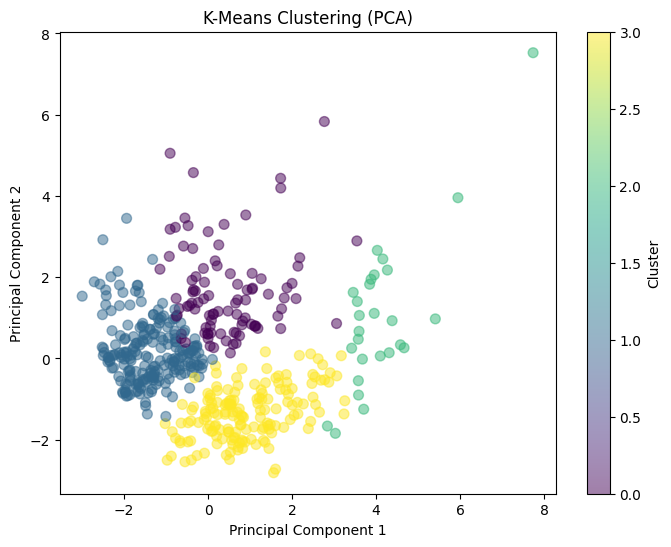

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.decomposition import PCA

# Assuming x_cr contains your centered and scaled data
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(x_cr)

# Index sorted by cluster labels
idk = np.argsort(kmeans.labels_)

# Distances to cluster centers
A = kmeans.transform(x_cr)

# Create a DataFrame to hold the data with cluster labels and distances
cluster_df = pd.DataFrame({'Classe': kmeans.labels_, 'ID': df.index, 'DistG1': A[:,0], 'DistG2': A[:,1], 'DistG3': A[:,2],'DistG3': A[:,3]})
print(cluster_df)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_cr)

# Visualize clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (PCA)')
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

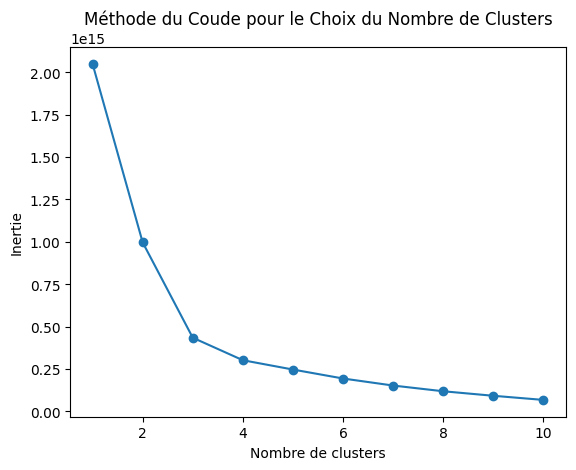

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


# Calcul de l'inertie pour différents nombres de clusters
inertias = []
for i in range(1, 11):  # Tester pour un nombre de clusters de 1 à 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X.values)
    inertias.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.title('Méthode du Coude pour le Choix du Nombre de Clusters')
plt.show()

In [ ]:
# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(x_cr)

# Ajout des informations de clusters aux données
X['cluster'] = clusters

# Calcul des moyennes des caractéristiques de chaque cluster
cluster_means = X.groupby('cluster').mean()
print("Moyennes des caractéristiques de chaque cluster :")
print(cluster_means)

# Calcul des différences significatives entre les clusters
cluster_diff = cluster_means.diff().iloc[1:]  # Différences par rapport au premier cluster
print("\nDifférences significatives entre les clusters :")
print(cluster_diff)

# Caractéristiques les plus discriminantes pour chaque cluster
print("\nCaractéristiques les plus discriminantes pour chaque cluster :")
for i, row in cluster_diff.iterrows():
    print(f"Cluster {i}:")
    max_diff_feature = row.idxmax()
    max_diff_value = row.max()
    print(f"Caractéristique la plus discriminante: {max_diff_feature}, Différence: {max_diff_value}")

Moyennes des caractéristiques de chaque cluster :
            Inches        Ram    Weight  Price_euros  ScreenResolution  \
cluster                                                                  
0        14.940278  15.111111  1.901528  2167.890694      3.683925e+06   
1        15.817091   6.792727  2.236036   756.405927      1.777177e+06   
2        13.607843   7.738562  1.459320  1185.750131      2.373542e+06   

             powerCpu  Memory_size  
cluster                             
0        4.179441e+06   487.111111  
1        1.776494e+06   638.807273  
2        2.041310e+06   312.418301  

Différences significatives entre les clusters :
           Inches       Ram    Weight  Price_euros  ScreenResolution  \
cluster                                                                
1        0.876813 -8.318384  0.334509 -1411.484767     -1.906748e+06   
2       -2.209248  0.945835 -0.776716   429.344203      5.963645e+05   

             powerCpu  Memory_size  
cluster            

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     Classe   ID    DistG1    DistG2    DistG3
0         1    1  3.438041  1.527902  3.643794
1         2    3  3.921211  2.110063  1.376730
2         0    4  1.284883  4.297353  4.779529
3         1    5  2.870503  1.705674  3.787887
4         1    9  2.358458  2.252474  3.527579
..      ...  ...       ...       ...       ...
495       2  743  4.171139  3.230674  2.193445
496       0  744  2.226043  4.342503  4.118448
497       1  745  4.425504  2.240585  2.797818
498       2  747  5.323251  3.319440  1.563887
499       2  749  4.575891  2.621758  1.664214

[500 rows x 5 columns]


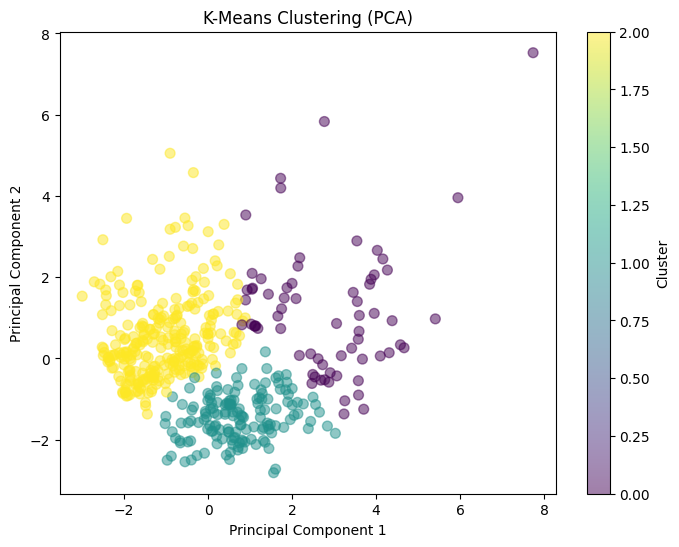

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.decomposition import PCA

# Assuming x_cr contains your centered and scaled data
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(x_cr)

# Index sorted by cluster labels
idk = np.argsort(kmeans.labels_)

# Distances to cluster centers
A = kmeans.transform(x_cr)

# Create a DataFrame to hold the data with cluster labels and distances
cluster_df = pd.DataFrame({'Classe': kmeans.labels_, 'ID': df.index, 'DistG1': A[:,0], 'DistG2': A[:,1], 'DistG3': A[:,2]})
print(cluster_df)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_cr)

# Visualize clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (PCA)')
plt.colorbar(label='Cluster')
plt.show()

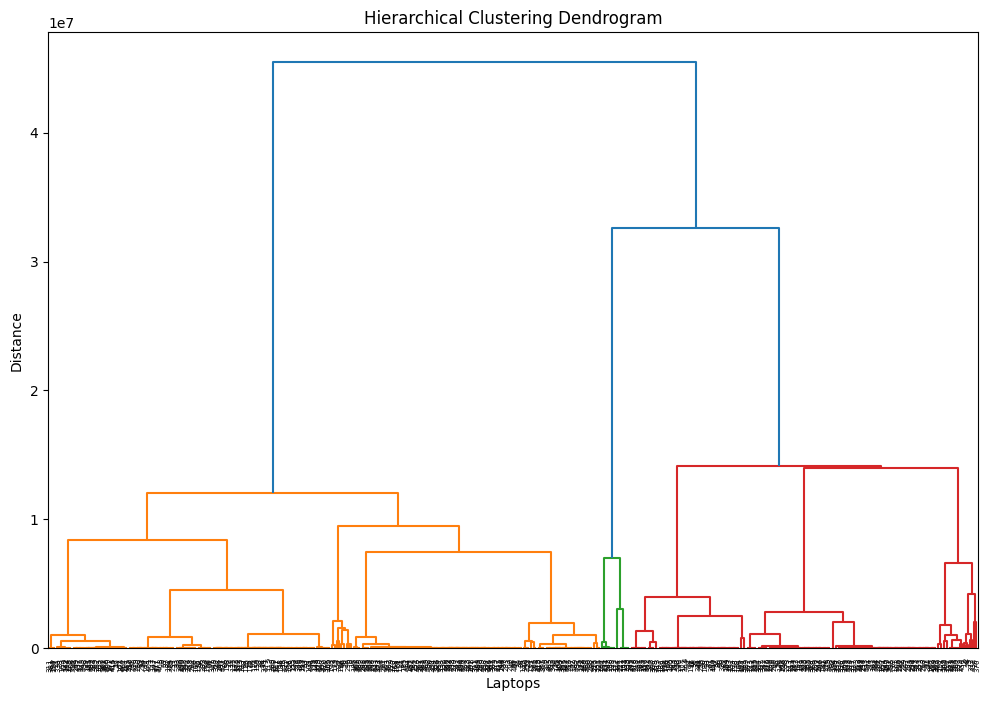

In [ ]:
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Drop non-numeric columns if any
numeric_df = df.select_dtypes(include=['number'])

# Perform hierarchical clustering
Z = hierarchy.linkage(numeric_df, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dn = hierarchy.dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Laptops')
plt.ylabel('Distance')
plt.show()


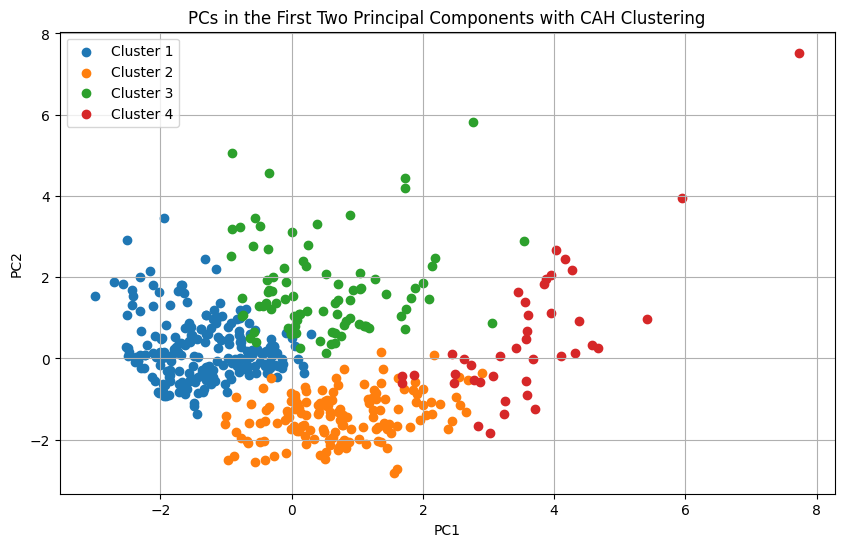

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Drop non-numeric columns if any
numeric_df = x_cr

# Perform hierarchical clustering
Z = hierarchy.linkage(numeric_df, method='ward')

# Determine cluster labels
k = 4  # Number of clusters (you can change this)
cluster_labels = fcluster(Z, k, criterion='maxclust')

# Apply PCA
pca = PCA(n_components=2)
pc_scores = pca.fit_transform(numeric_df)

# Create DataFrame with PC scores and cluster labels
pc_df = pd.DataFrame(pc_scores, columns=['PC1', 'PC2'])
pc_df['Cluster'] = cluster_labels

# Plot PCs
plt.figure(figsize=(10, 6))
for cluster in range(1, k+1):
    cluster_data = pc_df[pc_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('PCs in the First Two Principal Components with CAH Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()
